## पांडा के बुनियादी उदाहरण

यह नोटबुक आपको पांडा के कुछ बहुत ही बुनियादी अवधारणाओं के माध्यम से ले जाएगी। हम सामान्य डेटा विज्ञान लाइब्रेरी आयात करने से शुरू करेंगे:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### सीरीज

सीरीज एक सूची या 1D-ऐरे की तरह होती है, लेकिन इसमें इंडेक्स होता है। सभी ऑपरेशन्स इंडेक्स के साथ संरेखित होते हैं।


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


सिरीज़ का एक सामान्य उपयोग **टाइम सिरीज़** है। टाइम सिरीज़ में, इंडेक्स की एक विशेष संरचना होती है - आमतौर पर तारीखों या डेटटाइम्स की एक रेंज। हम `pd.date_range` का उपयोग करके ऐसा इंडेक्स बना सकते हैं।

मान लीजिए हमारे पास एक सिरीज़ है जो हर दिन खरीदे गए उत्पाद की मात्रा दिखाती है, और हमें पता है कि हर रविवार को हमें अपने लिए भी एक आइटम लेना होता है। इसे सिरीज़ का उपयोग करके इस तरह मॉडल किया जा सकता है:


Length of index is 366


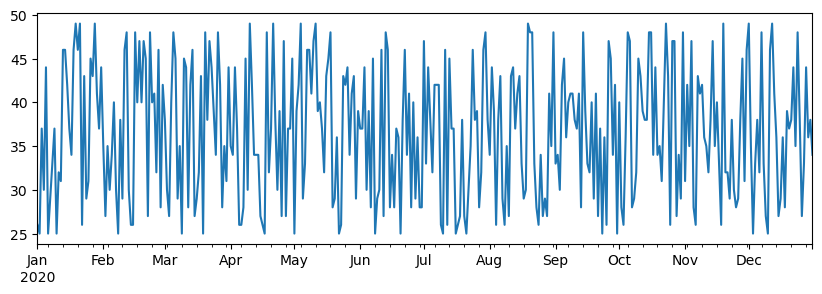

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


जैसा कि आप देख सकते हैं, यहां हमें समस्याएं हो रही हैं, क्योंकि साप्ताहिक श्रृंखला में उल्लेख न किए गए दिनों को गायब (`NaN`) माना जाता है, और किसी संख्या में `NaN` जोड़ने से हमें `NaN` मिलता है। सही परिणाम प्राप्त करने के लिए, हमें श्रृंखला जोड़ते समय `fill_value` निर्दिष्ट करना होगा:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


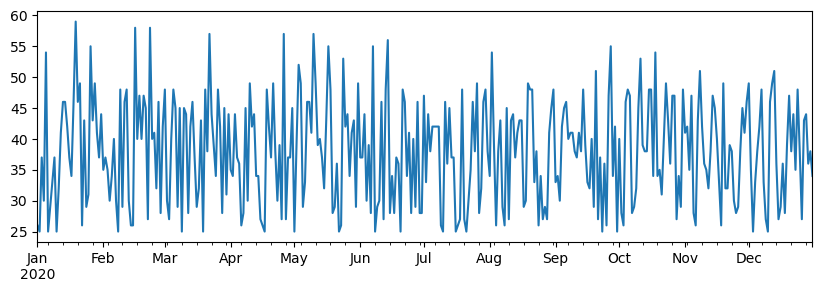

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

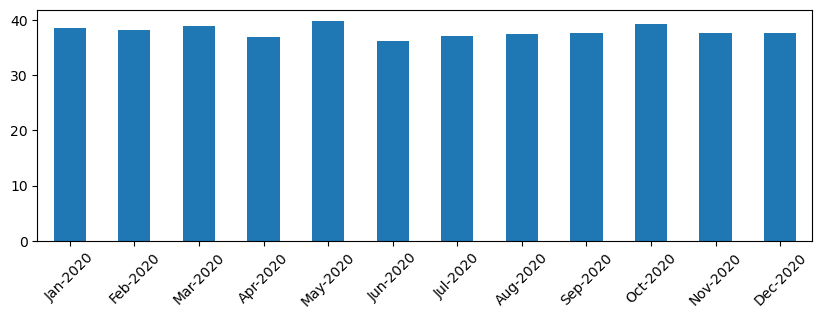

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## डेटा फ्रेम

डेटा फ्रेम मूल रूप से एक ही इंडेक्स वाले कई सीरीज़ का संग्रह होता है। हम कई सीरीज़ को एक साथ मिलाकर एक डेटा फ्रेम बना सकते हैं। ऊपर परिभाषित `a` और `b` सीरीज़ को ध्यान में रखते हुए:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

हम श्रृंखला को स्तंभों के रूप में भी उपयोग कर सकते हैं, और शब्दकोश का उपयोग करके स्तंभ नाम निर्दिष्ट कर सकते हैं:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

उसी परिणाम को स्थानांतरण (और फिर कॉलम का नाम बदलकर, पिछले उदाहरण से मेल खाने के लिए) द्वारा प्राप्त किया जा सकता है:


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

डेटाफ्रेम से **कॉलम का चयन** इस प्रकार किया जा सकता है:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


पंक्तियों का चयन फ़िल्टर अभिव्यक्ति के आधार पर:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

जिस तरह से यह काम करता है वह यह है कि अभिव्यक्ति `df['A']<5` एक बूलियन श्रृंखला लौटाती है, जो इंगित करती है कि श्रृंखला के प्रत्येक तत्व के लिए अभिव्यक्ति `True` या `False` है। जब श्रृंखला को इंडेक्स के रूप में उपयोग किया जाता है, तो यह DataFrame में पंक्तियों का उपसमुच्चय लौटाती है। इसलिए मनमानी Python बूलियन अभिव्यक्ति का उपयोग करना संभव नहीं है, उदाहरण के लिए, `df[df['A']>5 and df['A']<7]` लिखना गलत होगा। इसके बजाय, आपको बूलियन श्रृंखला पर विशेष `&` ऑपरेशन का उपयोग करना चाहिए:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**नए गणनीय स्तंभ बनाना**। हम सहज अभिव्यक्तियों का उपयोग करके अपने DataFrame के लिए आसानी से नए गणनीय स्तंभ बना सकते हैं। नीचे दिया गया कोड A के औसत मान से उसका विचलन गणना करता है।


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

हम वास्तव में एक श्रंखला की गणना कर रहे हैं, और फिर इस श्रंखला को बाईं ओर सौंप रहे हैं, जिससे एक और स्तंभ बनता है।


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**संख्याओं के आधार पर पंक्तियों का चयन** `iloc` संरचना का उपयोग करके किया जा सकता है। उदाहरण के लिए, DataFrame से पहली 5 पंक्तियों का चयन करने के लिए:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**समूहीकरण** अक्सर Excel में *पिवट टेबल्स* के समान परिणाम प्राप्त करने के लिए उपयोग किया जाता है। मान लीजिए कि हम प्रत्येक दिए गए `LenB` संख्या के लिए कॉलम `A` का औसत मान निकालना चाहते हैं। तब हम अपने DataFrame को `LenB` द्वारा समूहित कर सकते हैं, और `mean` को कॉल कर सकते हैं:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

यदि हमें समूह में औसत और तत्वों की संख्या की गणना करनी हो, तो हम अधिक जटिल `aggregate` फ़ंक्शन का उपयोग कर सकते हैं:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## प्रिंटिंग और प्लॉटिंग

डेटा वैज्ञानिकों को अक्सर डेटा का विश्लेषण करना पड़ता है, इसलिए इसे विज़ुअलाइज़ करने में सक्षम होना महत्वपूर्ण है। जब DataFrame बड़ा होता है, तो कई बार हम केवल यह सुनिश्चित करना चाहते हैं कि हम सब कुछ सही कर रहे हैं, इसके लिए हम पहले कुछ पंक्तियों को प्रिंट कर सकते हैं। यह `df.head()` को कॉल करके किया जा सकता है। यदि आप इसे Jupyter Notebook से चला रहे हैं, तो यह DataFrame को एक सुंदर टेबल के रूप में प्रदर्शित करेगा।


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

हमने कुछ कॉलम को विज़ुअलाइज़ करने के लिए `plot` फ़ंक्शन के उपयोग को भी देखा है। जबकि `plot` कई कार्यों के लिए बहुत उपयोगी है और `kind=` पैरामीटर के माध्यम से कई अलग-अलग ग्राफ़ प्रकारों का समर्थन करता है, आप हमेशा कुछ अधिक जटिल प्लॉट करने के लिए मूल `matplotlib` लाइब्रेरी का उपयोग कर सकते हैं। हम डेटा विज़ुअलाइज़ेशन को अलग कोर्स पाठों में विस्तार से कवर करेंगे।


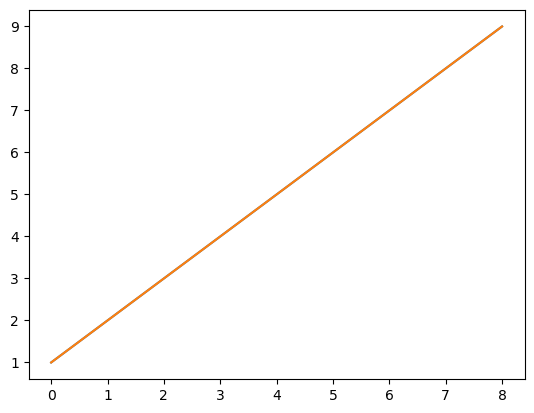

In [61]:
df['A'].plot()
plt.show()

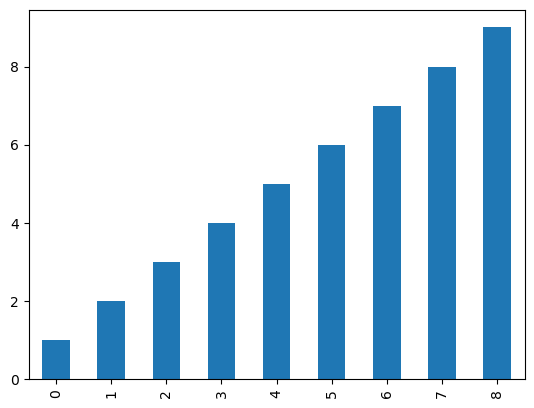

In [63]:
df['A'].plot(kind='bar')
plt.show()

यह अवलोकन Pandas के सबसे महत्वपूर्ण अवधारणाओं को कवर करता है, हालांकि यह लाइब्रेरी बहुत समृद्ध है, और इसके साथ आप क्या कर सकते हैं इसकी कोई सीमा नहीं है! अब चलिए इस ज्ञान का उपयोग करके एक विशेष समस्या को हल करते हैं।



---

**अस्वीकरण**:  
यह दस्तावेज़ AI अनुवाद सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) का उपयोग करके अनुवादित किया गया है। जबकि हम सटीकता सुनिश्चित करने का प्रयास करते हैं, कृपया ध्यान दें कि स्वचालित अनुवाद में त्रुटियां या अशुद्धियां हो सकती हैं। मूल भाषा में उपलब्ध मूल दस्तावेज़ को प्रामाणिक स्रोत माना जाना चाहिए। महत्वपूर्ण जानकारी के लिए, पेशेवर मानव अनुवाद की सिफारिश की जाती है। इस अनुवाद के उपयोग से उत्पन्न किसी भी गलतफहमी या गलत व्याख्या के लिए हम उत्तरदायी नहीं हैं।
